#Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import keras

#Load Data

In [3]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#Showing the shape of data

In [4]:
X_train.shape,Y_train.shape,'*******',X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), '*******', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
Y_train[0]

9

In [7]:
class_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shrit','Sneaker','Bag','Ankle boot']

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shrit',
 'Sneaker',
 'Bag',
 'Ankle boot']

#Showing an Image

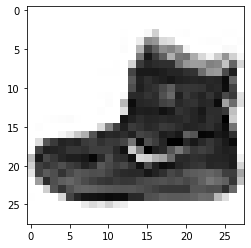

In [9]:
plt.imshow(X_train[0],cmap='Greys')

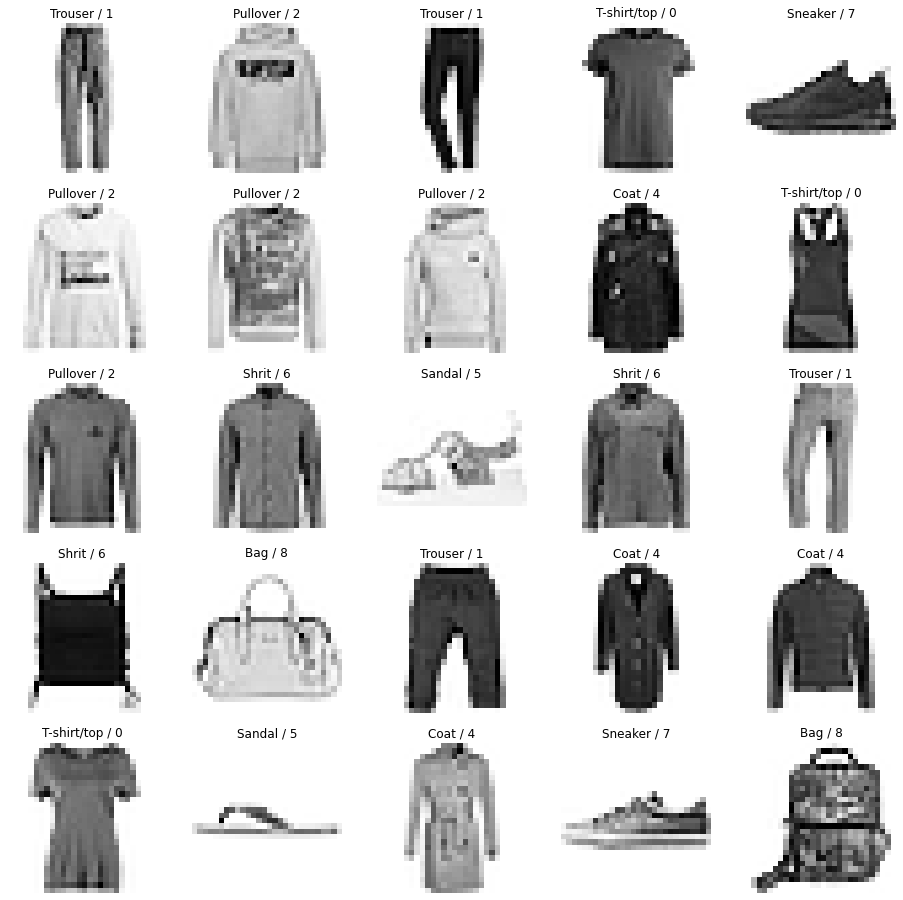

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[Y_train[i]],Y_train[i]))

In [11]:
X_train.ndim

3

In [12]:
X_train=np.expand_dims(X_train,-1)

In [13]:
X_train.ndim

4

In [14]:
X_test.ndim

3

In [15]:
X_test=np.expand_dims(X_test,-1)

In [16]:
X_test.ndim

4

#Feature Scaling

In [17]:
X_train=X_train/255
X_test=X_test/255

#Split Data Set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation=train_test_split(X_train,Y_train,test_size=0.2,random_state=2020)

In [19]:
X_train.shape,X_validation.shape,Y_train.shape,Y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#Building A CNN Model

In [20]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,Y_train,epochs=10,batch_size=512,verbose=1,validation_data=[X_validation,Y_validation])

Epoch 1/10
94/94 [==============================] - 19s 189ms/step - loss: 0.6249 - accuracy: 0.7883 - val_loss: 0.4286 - val_accuracy: 0.8521
Epoch 2/10
94/94 [==============================] - 13s 139ms/step - loss: 0.3898 - accuracy: 0.8634 - val_loss: 0.3633 - val_accuracy: 0.8750
Epoch 3/10
94/94 [==============================] - 13s 138ms/step - loss: 0.3353 - accuracy: 0.8828 - val_loss: 0.3640 - val_accuracy: 0.8687
Epoch 4/10
94/94 [==============================] - 13s 138ms/step - loss: 0.3037 - accuracy: 0.8935 - val_loss: 0.3204 - val_accuracy: 0.8890
Epoch 5/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2817 - accuracy: 0.9006 - val_loss: 0.3070 - val_accuracy: 0.8903
Epoch 6/10
94/94 [==============================] - 13s 139ms/step - loss: 0.2642 - accuracy: 0.9061 - val_loss: 0.2891 - val_accuracy: 0.8990
Epoch 7/10
94/94 [==============================] - 13s 139ms/step - loss: 0.2485 - accuracy: 0.9111 - val_loss: 0.2924 - val_accuracy: 0.8962

In [24]:
Y_pred=model.predict(X_test)
Y_pred.round(2)

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.15, 0.08, 0.01]], dtype=float32)

In [25]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2744 - accuracy: 0.9027


[0.2743850648403168, 0.9027000069618225]

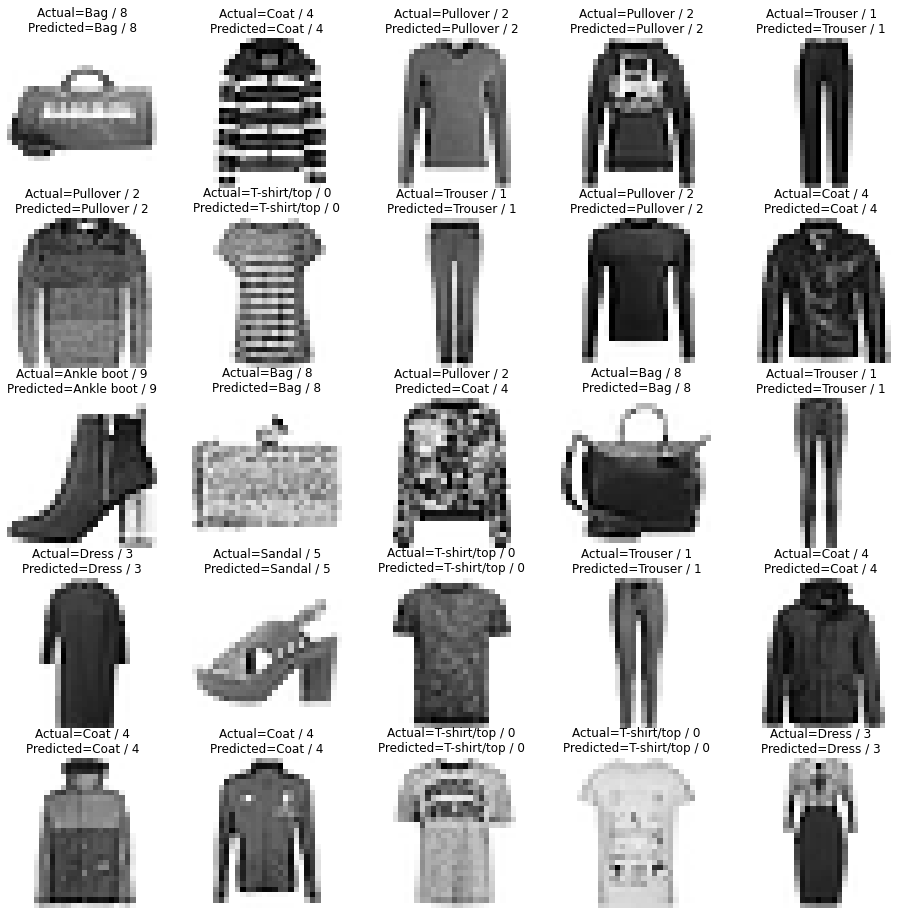

In [27]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={} / {}\nPredicted={} / {}'.format(class_labels[Y_test[i]],Y_test[i],class_labels[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
  plt.axis('off')

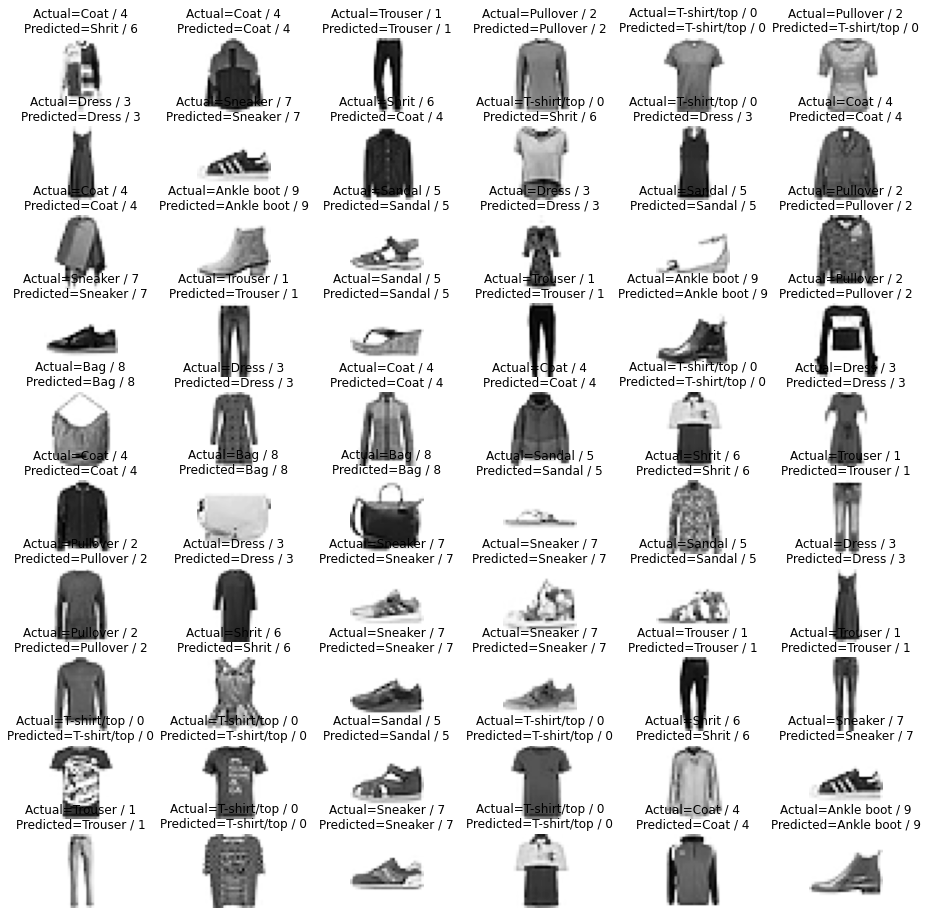

In [28]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={} / {}\nPredicted={} / {}'.format(class_labels[Y_test[i]],Y_test[i],class_labels[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
  plt.axis('off')

#Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
Y_pred_labels=[np.argmax(label) for label in Y_pred]
cm=confusion_matrix(Y_test,Y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.88      0.81      0.84      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shrit       0.76      0.69      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



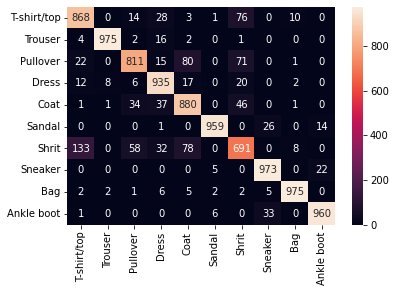

In [30]:
sn.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(Y_test,Y_pred_labels,target_names=class_labels)
print(cr)

#Save Model

In [31]:
model.save('fashion_mnist_cnn_model.h5')

#Build 2 Complex CNN

In [32]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [33]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
cnn_model2.fit(X_train, Y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, Y_validation))

Epoch 1/20
94/94 [==============================] - 17s 178ms/step - loss: 1.0378 - accuracy: 0.6120 - val_loss: 0.5828 - val_accuracy: 0.7747
Epoch 2/20
94/94 [==============================] - 17s 183ms/step - loss: 0.5607 - accuracy: 0.7913 - val_loss: 0.4621 - val_accuracy: 0.8288
Epoch 3/20
94/94 [==============================] - 17s 180ms/step - loss: 0.4609 - accuracy: 0.8296 - val_loss: 0.4073 - val_accuracy: 0.8465
Epoch 4/20
94/94 [==============================] - 17s 179ms/step - loss: 0.4068 - accuracy: 0.8512 - val_loss: 0.3845 - val_accuracy: 0.8571
Epoch 5/20
94/94 [==============================] - 18s 192ms/step - loss: 0.3729 - accuracy: 0.8620 - val_loss: 0.3506 - val_accuracy: 0.8714
Epoch 6/20
94/94 [==============================] - 18s 188ms/step - loss: 0.3482 - accuracy: 0.8724 - val_loss: 0.3291 - val_accuracy: 0.8781
Epoch 7/20
94/94 [==============================] - 19s 207ms/step - loss: 0.3254 - accuracy: 0.8806 - val_loss: 0.3167 - val_accuracy: 0.8808

In [39]:
cnn_model2.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2732 - accuracy: 0.9064


[0.2731552720069885, 0.9064000248908997]

In [40]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

#Building 3 CNN Model

In [41]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [42]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
cnn_model3.fit(X_train, Y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, Y_validation))

Epoch 1/50
94/94 [==============================] - 38s 403ms/step - loss: 1.1836 - accuracy: 0.5369 - val_loss: 0.6373 - val_accuracy: 0.7572
Epoch 2/50
94/94 [==============================] - 40s 429ms/step - loss: 0.5973 - accuracy: 0.7760 - val_loss: 0.4960 - val_accuracy: 0.8099
Epoch 3/50
94/94 [==============================] - 37s 398ms/step - loss: 0.4779 - accuracy: 0.8267 - val_loss: 0.4102 - val_accuracy: 0.8479
Epoch 4/50
94/94 [==============================] - 37s 397ms/step - loss: 0.4051 - accuracy: 0.8540 - val_loss: 0.3743 - val_accuracy: 0.8630
Epoch 5/50
94/94 [==============================] - 38s 407ms/step - loss: 0.3688 - accuracy: 0.8685 - val_loss: 0.3432 - val_accuracy: 0.8801
Epoch 6/50
94/94 [==============================] - 39s 410ms/step - loss: 0.3298 - accuracy: 0.8825 - val_loss: 0.3275 - val_accuracy: 0.8840
Epoch 7/50
94/94 [==============================] - 38s 402ms/step - loss: 0.3092 - accuracy: 0.8899 - val_loss: 0.3288 - val_accuracy: 0.8848

In [46]:
cnn_model3.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4482 - accuracy: 0.9066


[0.4482347071170807, 0.9065999984741211]

In [47]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')